#Домашнее задание № 13

#Алгоритмы кластеризации



In [40]:
# установим библиотеку
!pip install opencv-python

In [41]:
# вспомогательная функция для отображения картинок
import matplotlib.pyplot as plt
import cv2
import skimage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

def draw_picture(image, title, bgr=True):
    if bgr:
        b, g, r = cv2.split(image)
        image = cv2.merge([r, g, b])

    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(image)
    plt.title(title)
    plt.show()

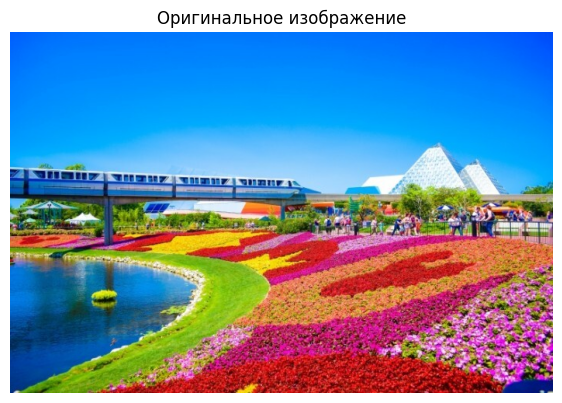

In [42]:
# посмотрим на нашу картинку
img = cv2.imread('/content/feml.jpeg')
draw_picture(img, 'Оригинальное изображение', bgr=True)

#2. Реализуем 3 модели кластеризации

a) KMeans. Число кластеров K = 2, 5, 10, 20

In [48]:
# загрузим библиотеки
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [49]:
# посмотрим размер нашего изображения
img.shape

(466, 700, 3)

In [52]:
# сделаем наше изображение "плоским" для загрузки в модель
original_image = img
reshaped_img = np.reshape(original_image,
	                        ((original_image.shape[0] * original_image.shape[1]),
                          3)
                         )
reshaped_img

array([[255,  92,   0],
       [255,  92,   0],
       [253,  93,   0],
       ...,
       [189, 213, 203],
       [187, 212, 202],
       [182, 208, 195]], dtype=uint8)

K=2

In [72]:
# построим модель с 2 кластерами
km = KMeans(n_clusters=2)

In [73]:
# обучим модель
km.fit(reshaped_img)
km

KMeans(n_clusters=2)

In [75]:
# получим предсказания
target = km.fit_predict(reshaped_img)
target

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [76]:
# найдем расположение центроидов (центров кластеров)
color_space = km.cluster_centers_
color_space

array([[ 73.92810232, 102.35422012, 163.62080927],
       [235.06981348, 145.37581781,  33.02273321]])

In [77]:
# вернем обратно в беззнаковое целое число, чтобы визуализировать изображение
output_image = np.reshape(color_space.astype('uint8')[target],
                          (original_image.shape[0], original_image.shape[1], 3)
                         )

In [78]:
# проверим размер
output_image.shape

(466, 700, 3)

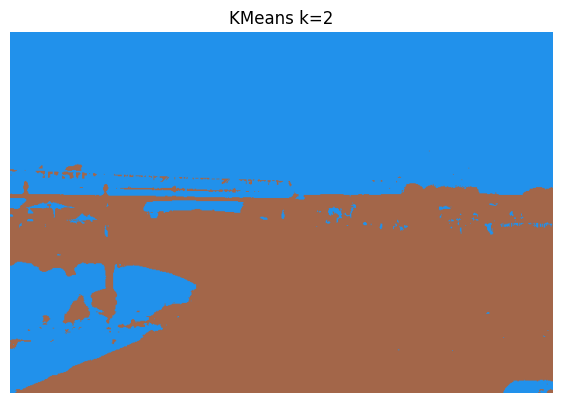

In [79]:
draw_picture(output_image, 'KMeans k=2', bgr=True)

k=5

In [99]:
# для дальнейших операций напишем маленькубю функцию
def KM_k(original_image=img, k=2):

  original_image = img
  reshaped_img = np.reshape(original_image,
	                          ((original_image.shape[0] * original_image.shape[1]),
                            3)
                           )

  km_ = KMeans(n_clusters=k)
  target_ = km_.fit_predict(reshaped_img)
  color_space_ = km_.cluster_centers_
  output_image_ = np.reshape(color_space_.astype('uint8')[target_],
                             (original_image.shape[0], original_image.shape[1], 3)
                            )
  draw_picture(output_image_, 'KMeans k={}'.format(k), bgr=True)

  return

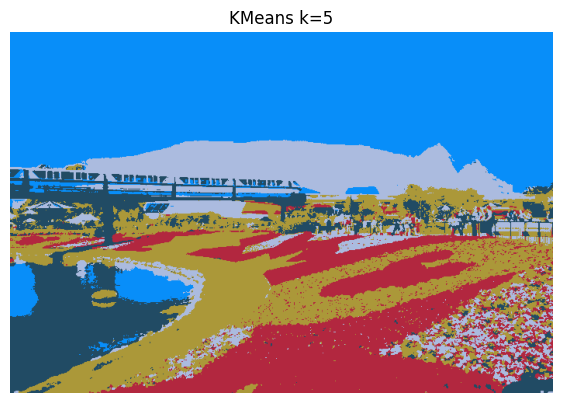

In [100]:
# посмотрим
KM_k(k=5)

k=10

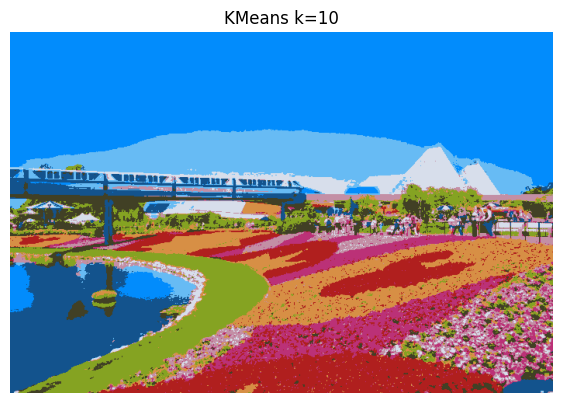

In [101]:
# посмотрим
KM_k(k=10)

k=20

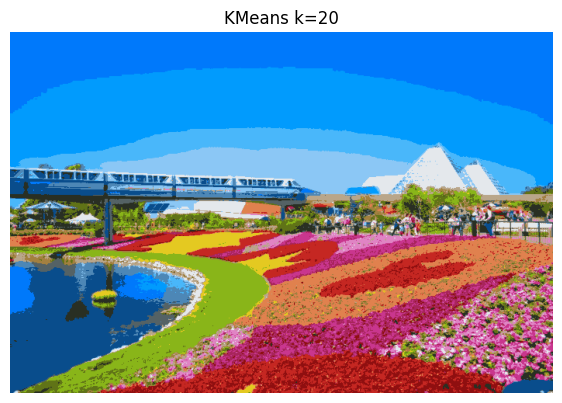

In [102]:
# посмотрим
KM_k(k=20)